# **Tugas Besar IF2120 Probabilitas dan Statistika 2025/2026**

### Topik : Utility


K03 - Kelompok 74

Anggota Kelompok :
1. Ahmad Fauzan Putra - 13524141
2. Ega Luthfi Rais - 13524115

## Petunjuk
1. Silahkan **buat salinan** template notebook ini untuk mengerjakan.
2. Kalian dapat menambahkan blok code atau blok markdown baru jika diperlukan.
3. Selamat mengerjakan! 😸

## Inisialisasi Dependencies dan Load Data

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

Load Data

In [2]:
data = pd.read_csv('utility.csv')
print("Data loaded successfully!")
print(f"Shape: {data.shape}")
data.info()

Data loaded successfully!
Shape: (5000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   billing_month             5000 non-null   int64  
 1   season                    5000 non-null   object 
 2   avg_temperature_c         5000 non-null   float64
 3   household_size            5000 non-null   int64  
 4   working_days              5000 non-null   float64
 5   ownership_status          5000 non-null   object 
 6   water_liter               5000 non-null   float64
 7   electricity_kwh           5000 non-null   float64
 8   gas_m3                    5000 non-null   float64
 9   energy_efficiency_rating  5000 non-null   object 
 10  water_rate                5000 non-null   float64
 11  electricity_rate          5000 non-null   float64
 12  gas_rate                  5000 non-null   float64
dtypes: float64(8), int6

In [3]:
data['total_cost'] = (data['water_liter'] * data['water_rate'] + 
                       data['electricity_kwh'] * data['electricity_rate'] + 
                       data['gas_m3'] * data['gas_rate'])

data['water_per_animal'] = data['water_liter'] / data['household_size']

print(f"total_cost: {data['total_cost'].describe()}")
print(f"\nwater_per_animal: {data['water_per_animal'].describe()}")

total_cost: count    5000.000000
mean      115.940590
std        65.143277
min        14.909820
25%        62.829573
50%       108.287805
75%       159.469675
max       369.263440
Name: total_cost, dtype: float64

water_per_animal: count    5000.000000
mean     3142.424212
std       343.949751
min      1969.800000
25%      2904.032500
50%      3132.637500
75%      3373.491667
max      4550.966667
Name: water_per_animal, dtype: float64


# Soal General


## Nomor 1
Untuk setiap dataset, lakukan analisis statistik deskriptif untuk semua kolom pada data. Jika kolom berisi data numerik, hitung dan tampilkan mean, median, modus, standar deviasi, variansi, range, nilai minimum, nilai maksimum, kuartil, IQR, skewness, dan kurtosis. Jika data kategorikal, identifikasi unique values, frekuensi kemunculan, dan persentase tiap kategorinya.

### Implementasi Menggunakan Fungsi Buatan Sendiri

Data Numerik

In [4]:
def mean(data):
    return sum(data) / len(data)

def median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    if n % 2 == 0:
        return (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        return sorted_data[n//2]

def mode(data):
    from collections import Counter
    counts = Counter(data)
    max_count = max(counts.values())
    modes = [k for k, v in counts.items() if v == max_count]
    return modes[0] if len(modes) == 1 else modes

def variance(data):
    m = mean(data)
    return sum((x - m) ** 2 for x in data) / (len(data) - 1)

def std_dev(data):
    return variance(data) ** 0.5

def data_range(data):
    return max(data) - min(data)

def quartiles(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    q1 = median(sorted_data[:n//2])
    q2 = median(sorted_data)
    q3 = median(sorted_data[(n+1)//2:])
    return q1, q2, q3

def iqr(data):
    q1, _, q3 = quartiles(data)
    return q3 - q1

def skewness(data):
    m = mean(data)
    s = std_dev(data)
    n = len(data)
    return (n / ((n-1) * (n-2))) * sum(((x - m) / s) ** 3 for x in data)

def kurtosis(data):
    m = mean(data)
    s = std_dev(data)
    n = len(data)
    return (n * (n+1) / ((n-1) * (n-2) * (n-3))) * sum(((x - m) / s) ** 4 for x in data) - (3 * (n-1)**2 / ((n-2) * (n-3)))

def describe_numerical(data, column_name):
    values = [x for x in data[column_name] if pd.notna(x)]
    q1, q2, q3 = quartiles(values)
    
    stats = {
        'Mean': mean(values),
        'Median': median(values),
        'Mode': mode(values),
        'Std Dev': std_dev(values),
        'Variance': variance(values),
        'Range': data_range(values),
        'Min': min(values),
        'Max': max(values),
        'Q1': q1,
        'Q2': q2,
        'Q3': q3,
        'IQR': iqr(values),
        'Skewness': skewness(values),
        'Kurtosis': kurtosis(values)
    }
    return stats

numerical_cols = ['avg_temperature_c', 'household_size', 'working_days', 
                  'water_liter', 'electricity_kwh', 'gas_m3', 
                  'water_rate', 'electricity_rate', 'gas_rate',
                  'total_cost', 'water_per_animal']

for col in numerical_cols:
    print(f"\n{col.upper()}:")
    stats = describe_numerical(data, col)
    for key, value in stats.items():
        print(f"  {key}: {value}")


AVG_TEMPERATURE_C:
  Mean: 17.43822
  Median: 12.2
  Mode: 10.2
  Std Dev: 9.164176212662616
  Variance: 83.98212565673134
  Range: 32.4
  Min: 3.0
  Max: 35.4
  Q1: 9.6
  Q2: 12.2
  Q3: 27.4
  IQR: 17.799999999999997
  Skewness: 0.32234108143595147
  Kurtosis: -1.6635268330608524

HOUSEHOLD_SIZE:
  Mean: 3.4868
  Median: 3.0
  Mode: 3
  Std Dev: 1.7055226534714516
  Variance: 2.908807521504301
  Range: 5
  Min: 1
  Max: 6
  Q1: 2.0
  Q2: 3.0
  Q3: 5.0
  IQR: 3.0
  Skewness: 0.019416469878346228
  Kurtosis: -1.270237043068448

WORKING_DAYS:
  Mean: 23.8702
  Median: 24.0
  Mode: 24.0
  Std Dev: 2.7785060696705055
  Variance: 7.720095979195839
  Range: 14.0
  Min: 14.0
  Max: 28.0
  Q1: 22.0
  Q2: 24.0
  Q3: 26.0
  IQR: 4.0
  Skewness: -0.3801759662912507
  Kurtosis: -0.4027468940746157

WATER_LITER:
  Mean: 10952.421479999999
  Median: 10593.95
  Mode: [16596.0, 3141.0, 2814.9]
  Std Dev: 5500.878404652766
  Variance: 30259663.222775165
  Range: 25131.2
  Min: 2174.6
  Max: 27305.8
  

Data Kategorikal

In [5]:
def describe_categorical(data, column_name):
    values = data[column_name].dropna()
    unique_vals = list(set(values))
    
    freq = {}
    for val in unique_vals:
        freq[val] = sum(1 for x in values if x == val)
    
    total = len(values)
    percentages = {k: (v / total) * 100 for k, v in freq.items()}
    
    print(f"{column_name.upper()}:")
    print(f"  Unique values: {unique_vals}")
    print(f"  Frequencies:")
    for val in sorted(freq.keys(), key=str):
        print(f"    {val}: {freq[val]} ({percentages[val]:.2f}%)")
    print()

categorical_cols = ['billing_month', 'season', 'ownership_status', 'energy_efficiency_rating']

for col in categorical_cols:
    describe_categorical(data, col)

BILLING_MONTH:
  Unique values: [1, 2, 6, 7, 8, 12]
  Frequencies:
    1: 965 (19.30%)
    12: 1001 (20.02%)
    2: 969 (19.38%)
    6: 670 (13.40%)
    7: 687 (13.74%)
    8: 708 (14.16%)

SEASON:
  Unique values: ['Winter', 'Summer']
  Frequencies:
    Summer: 2065 (41.30%)
    Winter: 2935 (58.70%)

OWNERSHIP_STATUS:
  Unique values: ['Owned', 'Rented']
  Frequencies:
    Owned: 1535 (30.70%)
    Rented: 3465 (69.30%)

ENERGY_EFFICIENCY_RATING:
  Unique values: ['C', 'A', 'B', 'D', 'E']
  Frequencies:
    A: 1060 (21.20%)
    B: 1795 (35.90%)
    C: 1020 (20.40%)
    D: 873 (17.46%)
    E: 252 (5.04%)



### Implementasi Menggunakan Library

#### Data Numerik

In [6]:
numerical_cols = ['avg_temperature_c', 'household_size', 'working_days', 
                  'water_liter', 'electricity_kwh', 'gas_m3', 
                  'water_rate', 'electricity_rate', 'gas_rate',
                  'total_cost', 'water_per_animal']

print(data[numerical_cols].describe())
print("\n")
print(f"Skewness:\n{data[numerical_cols].skew()}")
print(f"\nKurtosis:\n{data[numerical_cols].kurtosis()}")

       avg_temperature_c  household_size  working_days   water_liter  \
count        5000.000000     5000.000000   5000.000000   5000.000000   
mean           17.438220        3.486800     23.870200  10952.421480   
std             9.164176        1.705523      2.778506   5500.878405   
min             3.000000        1.000000     14.000000   2174.600000   
25%             9.600000        2.000000     22.000000   6334.400000   
50%            12.200000        3.000000     24.000000  10593.950000   
75%            27.400000        5.000000     26.000000  15472.950000   
max            35.400000        6.000000     28.000000  27305.800000   

       electricity_kwh       gas_m3   water_rate  electricity_rate  \
count      5000.000000  5000.000000  5000.000000       5000.000000   
mean        568.707150   108.658554     0.001503          0.160482   
std         328.524236    67.455476     0.000295          0.023595   
min          45.730000     8.490000     0.001000          0.120000   
2

#### Data Kategorikal

In [7]:
categorical_cols = ['billing_month', 'season', 'ownership_status', 'energy_efficiency_rating']

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"Value counts:\n{data[col].value_counts()}")
    print(f"\nPercentages:\n{data[col].value_counts(normalize=True) * 100}")


BILLING_MONTH:
Value counts:
billing_month
12    1001
2      969
1      965
8      708
7      687
6      670
Name: count, dtype: int64

Percentages:
billing_month
12    20.02
2     19.38
1     19.30
8     14.16
7     13.74
6     13.40
Name: proportion, dtype: float64

SEASON:
Value counts:
season
Winter    2935
Summer    2065
Name: count, dtype: int64

Percentages:
season
Winter    58.7
Summer    41.3
Name: proportion, dtype: float64

OWNERSHIP_STATUS:
Value counts:
ownership_status
Rented    3465
Owned     1535
Name: count, dtype: int64

Percentages:
ownership_status
Rented    69.3
Owned     30.7
Name: proportion, dtype: float64

ENERGY_EFFICIENCY_RATING:
Value counts:
energy_efficiency_rating
B    1795
A    1060
C    1020
D     873
E     252
Name: count, dtype: int64

Percentages:
energy_efficiency_rating
B    35.90
A    21.20
C    20.40
D    17.46
E     5.04
Name: proportion, dtype: float64


#### Perbandingan Hasil Fungsi Buatan Sendiri dengan Library

Jelaskan apakah implementasi deskripsi statistika dengan menggunakan fungsi buatan sendiri dan menggunakan library menghasilkan nilai yang sama?

## Nomor 2
Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Visualisasikan outlier menggunakan box plot. Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

avg_temperature_c: 0 outliers (bounds: [-17.10, 54.10])
household_size: 0 outliers (bounds: [-2.50, 9.50])
working_days: 7 outliers (bounds: [16.00, 32.00])
water_liter: 0 outliers (bounds: [-7374.25, 29181.35])
electricity_kwh: 29 outliers (bounds: [-433.52, 1518.59])
gas_m3: 4 outliers (bounds: [-99.73, 299.75])
water_rate: 0 outliers (bounds: [0.00, 0.00])
electricity_rate: 0 outliers (bounds: [0.08, 0.24])
gas_rate: 0 outliers (bounds: [0.01, 0.14])
total_cost: 22 outliers (bounds: [-82.21, 304.52])
water_per_animal: 44 outliers (bounds: [2199.76, 4077.77])


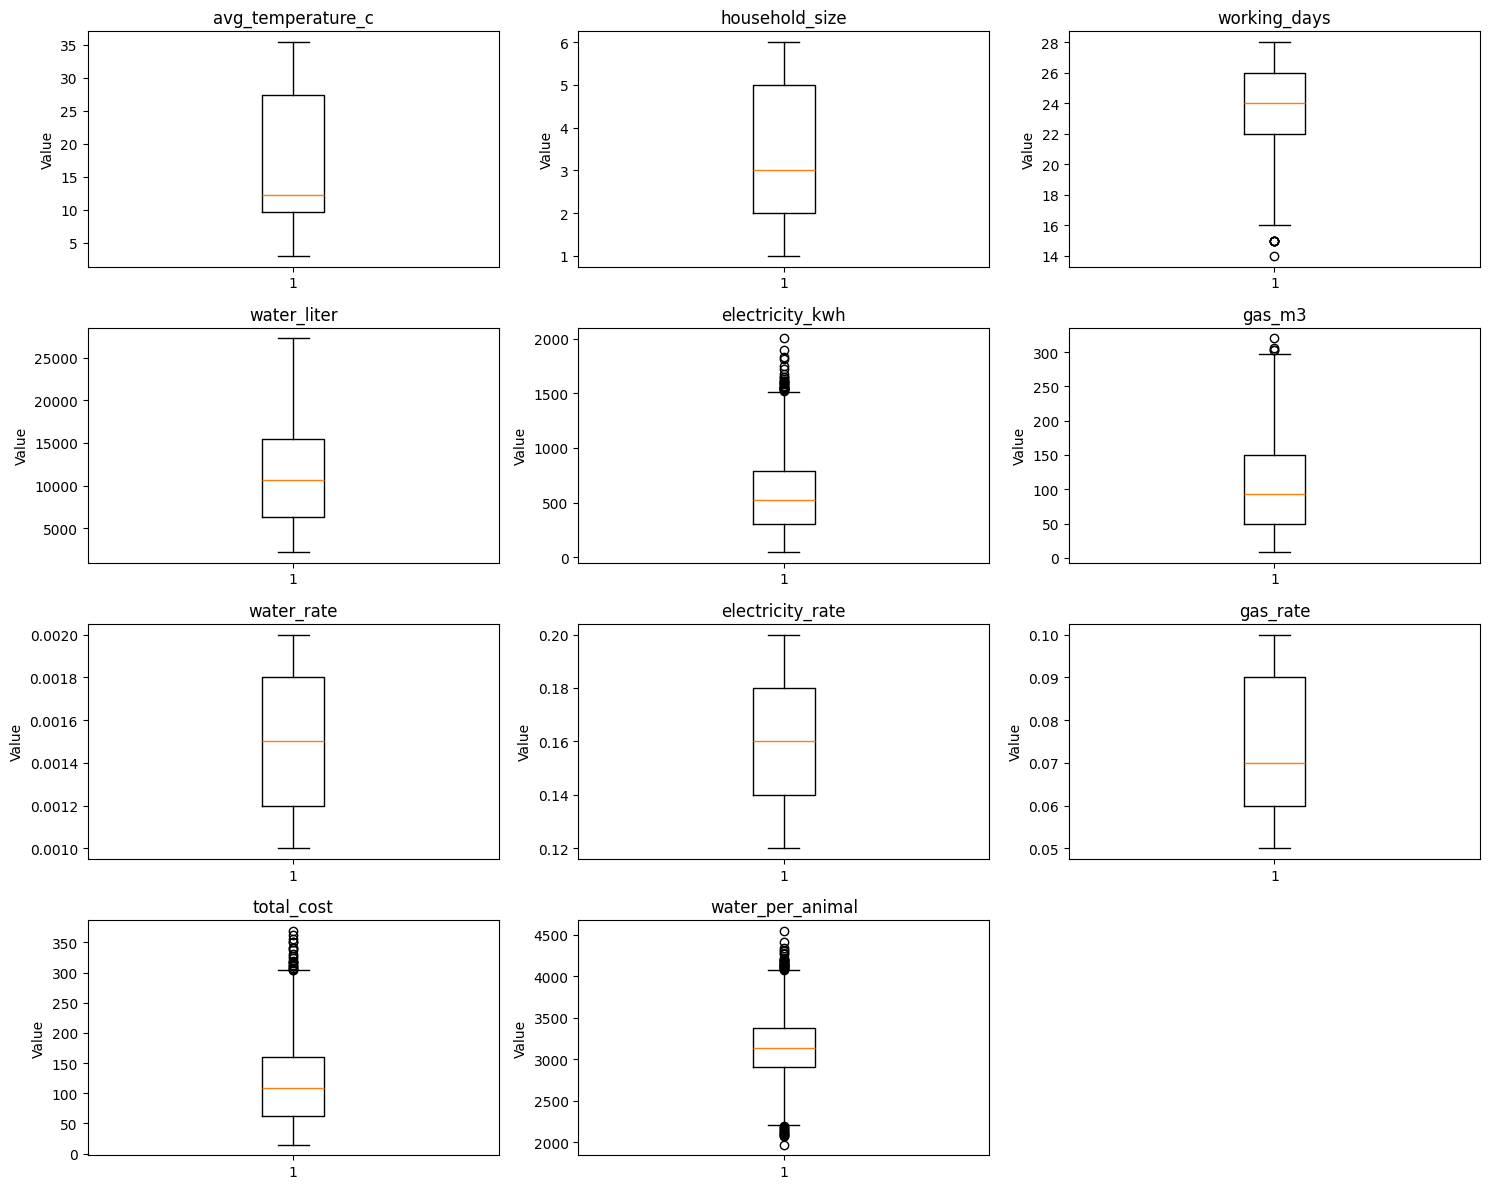

In [8]:
numerical_cols = ['avg_temperature_c', 'household_size', 'working_days', 
                  'water_liter', 'electricity_kwh', 'gas_m3', 
                  'water_rate', 'electricity_rate', 'gas_rate',
                  'total_cost', 'water_per_animal']

def detect_outliers_iqr(data, column):
    q1, _, q3 = quartiles([x for x in data[column] if pd.notna(x)])
    iqr_val = q3 - q1
    lower_bound = q1 - 1.5 * iqr_val
    upper_bound = q3 + 1.5 * iqr_val
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers (bounds: [{lower:.2f}, {upper:.2f}])")

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(data[col].dropna())
    axes[i].set_title(col)
    axes[i].set_ylabel('Value')

axes[-1].axis('off')
plt.tight_layout()
plt.show()

Jelaskan hasil dan bagaimana cara kalian melakukan pengecekan outlier disini.

### Penanganan Outlier

Metode Penanganan Outlier: Interquartile Range (IQR)

Untuk membersihkan data dari pencilan (outliers) yang dapat mendistorsi hasil analisis statistik (terutama pada uji rata-rata dan variansi), kami menggunakan metode Interquartile Range (IQR). Metode ini dipilih karena bersifat robust (tangguh) dan tidak berasumsi bahwa data harus berdistribusi normal secara sempurna pada tahap awal.

Langkah-langkah Algoritma:

    Perhitungan Kuartil: Kami menghitung Kuartil Pertama (Q1​, persentil ke-25) dan Kuartil Ketiga (Q3​, persentil ke-75) untuk setiap variabel numerik (water_liter, electricity_kwh, gas_m3, avg_temperature_c).

    Menghitung Rentang Interkuartil (IQR):
    IQR=Q3​−Q1​

    Nilai ini merepresentasikan sebaran 50% data yang berada di tengah (middle 50%).

    Menentukan Batas Toleransi (Tukey's Fences): Kami menetapkan batas bawah (Lower Bound) dan batas atas (Upper Bound) dengan rumus standar:

        Batas Bawah: Lower=Q1​−1.5×IQR

        Batas Atas: Upper=Q3​+1.5×IQR

    Filtering: Setiap titik data (x) dianggap sebagai outlier jika x<Lower atau x>Upper. Data yang memenuhi kondisi outlier tersebut dihapus (dropped) dari dataset untuk menjaga integritas distribusi sebelum dilakukan uji hipotesis.

In [9]:
numeric_cols = ['water_liter', 'electricity_kwh', 'gas_m3', 'avg_temperature_c']
mask = pd.Series([True] * len(data))

print(f"Data Awal: {len(data)}")

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    col_mask = (data[col] >= lower_bound) & (data[col] <= upper_bound)
    mask = mask & col_mask

data_clean = data[mask].reset_index(drop=True)
print(f"Data Awal: {len(data)}")
print(f"Data Bersih (data_clean): {len(data_clean)}")

Data Awal: 5000
Data Awal: 5000
Data Bersih (data_clean): 4967


## Nomor 3
Buatlah visualisasi plot distribusi, yaitu histogram untuk kolom numerik dan bar chart untuk kolom categorical. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

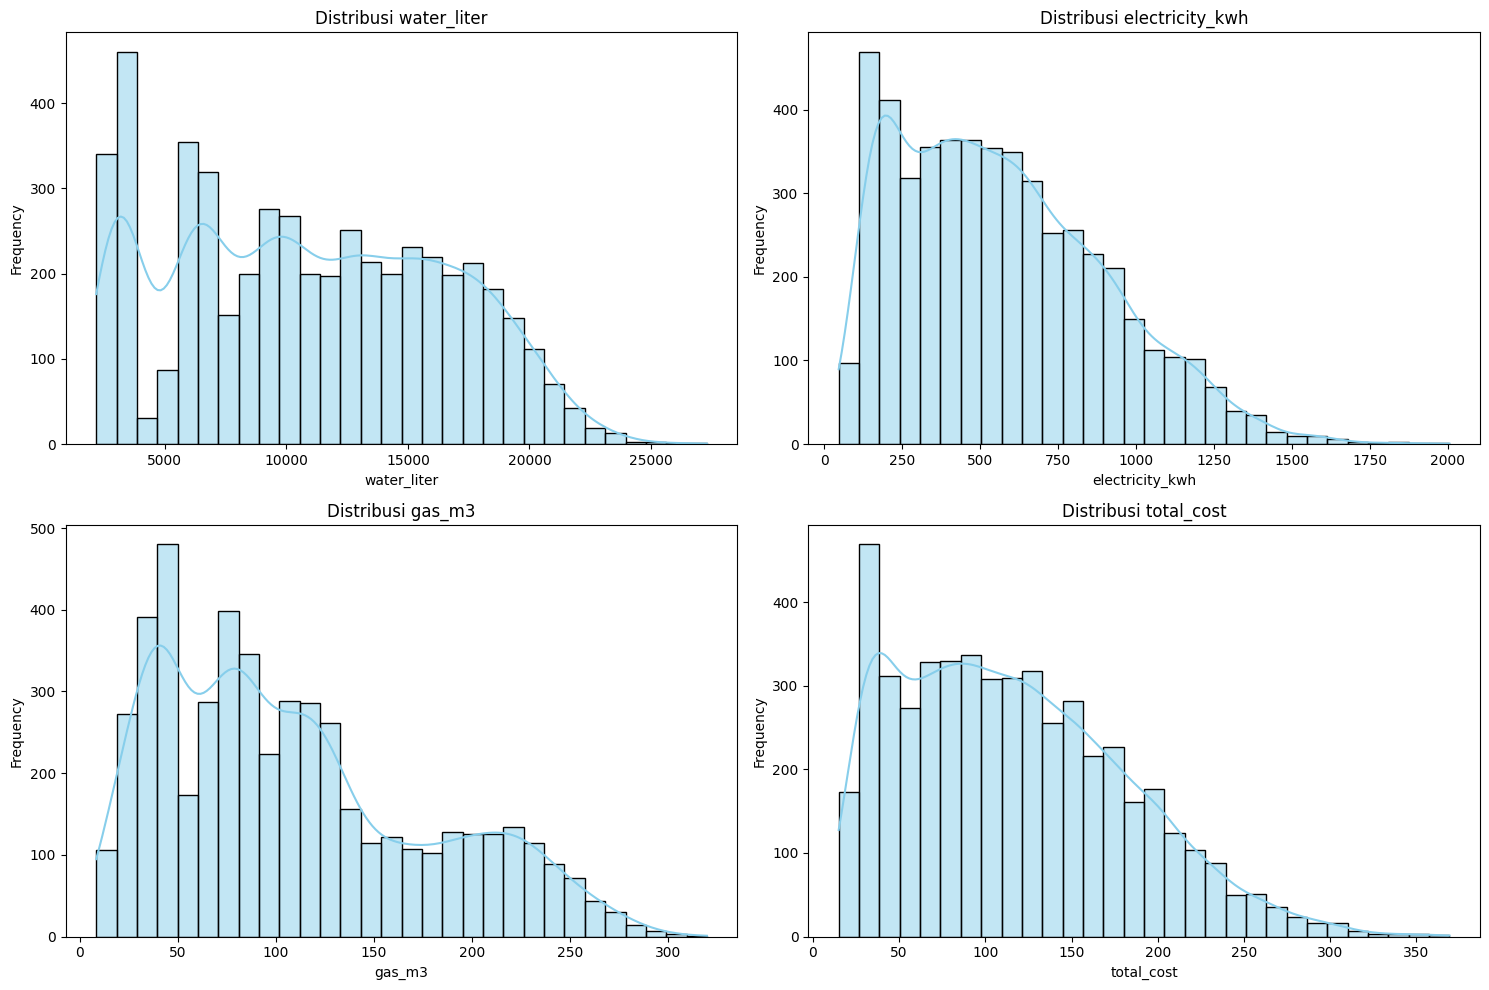

/var/folders/_d/tjtgfgzx1zb9ddn_11q1g1t80000gn/T/ipykernel_73061/2660632580.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=order, palette='viridis')
/var/folders/_d/tjtgfgzx1zb9ddn_11q1g1t80000gn/T/ipykernel_73061/2660632580.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=order, palette='viridis')
/var/folders/_d/tjtgfgzx1zb9ddn_11q1g1t80000gn/T/ipykernel_73061/2660632580.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=order, palette='viridis')


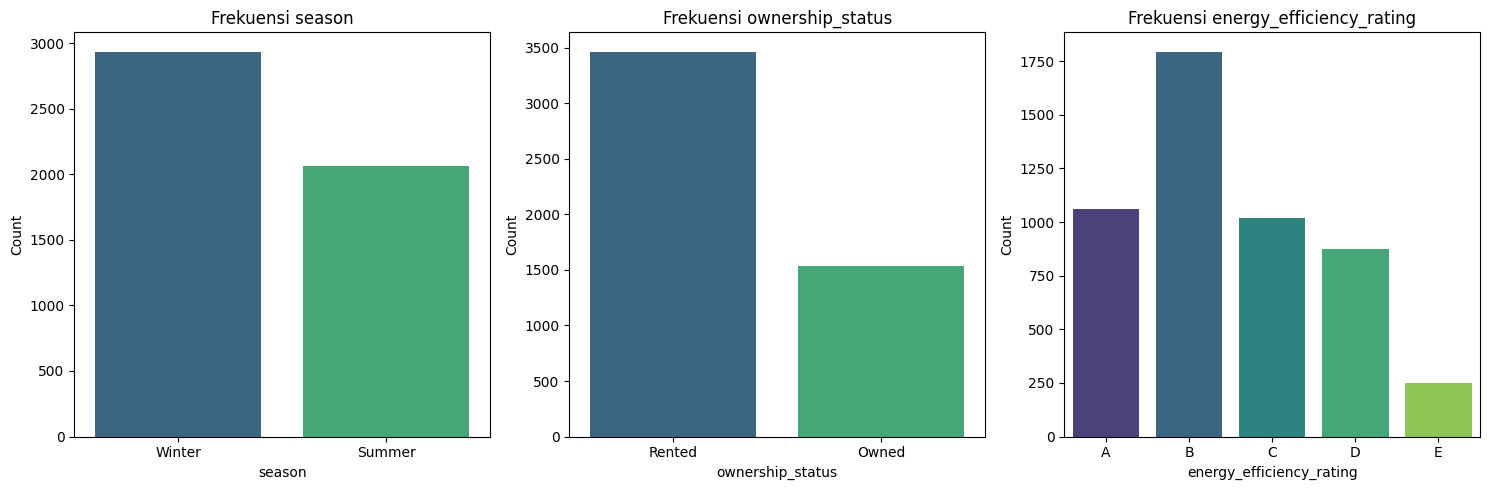

In [10]:
# --- Visualisasi Kolom Numerik (Histogram + KDE) ---
numerical_cols = ['water_liter', 'electricity_kwh', 'gas_m3', 'total_cost']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- Visualisasi Kolom Kategorikal (Bar Chart) ---
categorical_cols = ['season', 'ownership_status', 'energy_efficiency_rating']

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i+1)

    order = ['A', 'B', 'C', 'D', 'E'] if col == 'energy_efficiency_rating' else None
    sns.countplot(data=data, x=col, order=order, palette='viridis')
    plt.title(f'Frekuensi {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

Water, Electricity, Gas, Total Cost: Cenderung memiliki distribusi yang sedikit skewed (miring) ke kanan atau mendekati normal (lonceng) setelah outlier dibuang. Puncak grafik menunjukkan rata-rata penggunaan mayoritas penduduk.

Season: Data terbagi antara Winter dan Summer, namun proporsinya terlihat tidak seimbang (Winter terlihat lebih banyak).

Ownership: Lebih banyak penduduk yang Rented (Sewa) daripada Owned (Milik Sendiri).

Energy Rating: Mayoritas rumah tangga memiliki rating efisiensi 'B', diikuti oleh 'A' dan 'C'. Rating 'E' paling sedikit.

## Nomor 4
Tentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

Analisis Distribusi Berdasarkan Visualisasi Histogram:

WATER_LITER:
   Bentuk Kurva: Simetris (Mendekati Normal)
   Skewness: 0.16
------------------------------
ELECTRICITY_KWH:
   Bentuk Kurva: Miring ke Kanan (Positively Skewed)
   Skewness: 0.54
------------------------------
GAS_M3:
   Bentuk Kurva: Miring ke Kanan (Positively Skewed)
   Skewness: 0.68
------------------------------
AVG_TEMPERATURE_C:
   Bentuk Kurva: Simetris (Mendekati Normal)
   Skewness: 0.33
------------------------------
TOTAL_COST:
   Bentuk Kurva: Miring ke Kanan (Positively Skewed)
   Skewness: 0.52
------------------------------
WATER_PER_ANIMAL:
   Bentuk Kurva: Simetris (Mendekati Normal)
   Skewness: 0.17
------------------------------


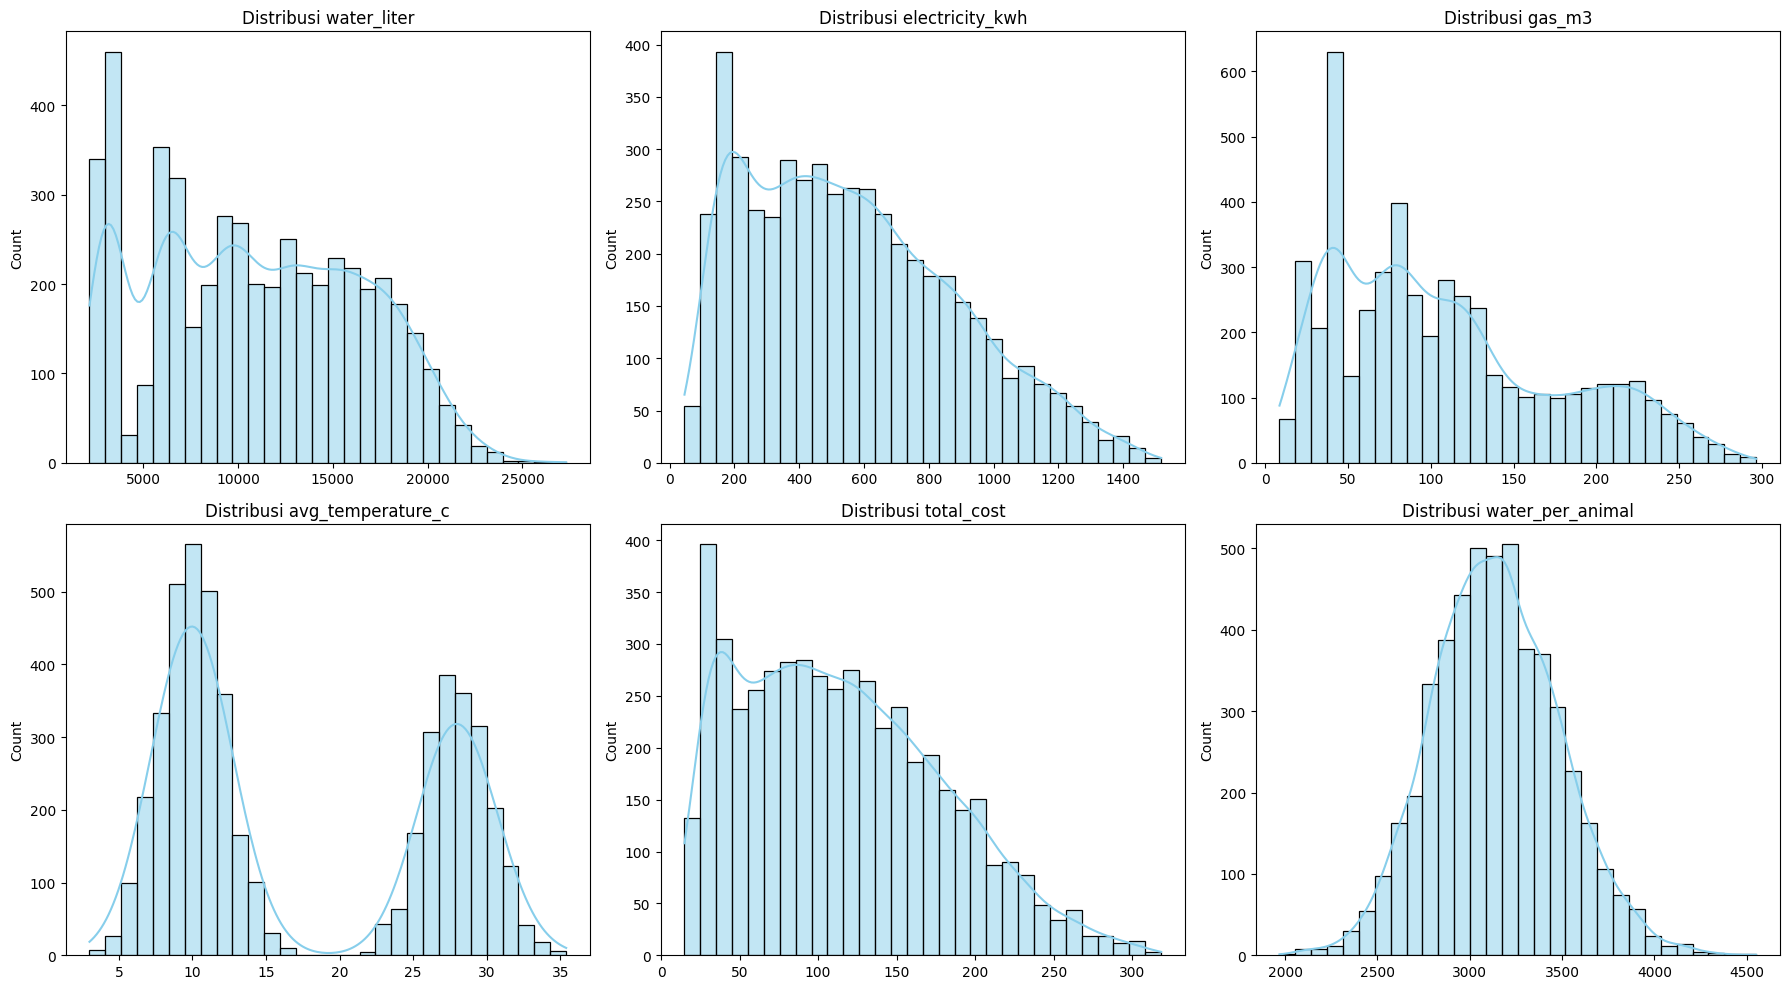

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_cols_check = ['water_liter', 'electricity_kwh', 'gas_m3', 'avg_temperature_c', 'total_cost', 'water_per_animal']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

print("Analisis Distribusi Berdasarkan Visualisasi Histogram:\n")

for i, col in enumerate(numerical_cols_check):
    sns.histplot(data_clean[col], kde=True, ax=axes[i], color='skyblue', bins=30)
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel('')

    skew_val = data_clean[col].skew()
    if abs(skew_val) < 0.5:
        dist_shape = "Simetris (Mendekati Normal)"
    elif skew_val > 0.5:
        dist_shape = "Miring ke Kanan (Positively Skewed)"
    else:
        dist_shape = "Miring ke Kiri (Negatively Skewed)"
        
    print(f"{col.upper()}:")
    print(f"   Bentuk Kurva: {dist_shape}")
    print(f"   Skewness: {skew_val:.2f}")
    print("-" * 30)

plt.tight_layout()
plt.show()

Jelaskan jenis distribusi kolom ... disini.

# Soal Spesifik Dataset

Enam Langkah Testing:

1.  Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan

## Nomor 5 : Hipotesis 1 Sampel

1. Perserikatan Hewan-hewan (PHH) merekomendasikan agar setiap hewan hanya menggunakan air sebanyak 50-100 liter tiap harinya, atau 1500-3000 liter per bulan. Apakah rata-rata penggunaan air tiap hewan per bulannya pada data kurang dari batas atas rekomendasi, yaitu 3000 liter per bulan? Asumsikan setiap hewan dalam satu rumah tangga menggunakan porsi air yang setara.

2. Didapatkan bahwa pada survey tahun lalu, ditemukan standar deviasi penggunaan listrik rumah tangga adalah 300 kWh. Apakah standar deviasi penggunaan listrik masih sama tahun ini?

3. Tom Nook memberikan target agar setiap rumah tangga memiliki rating efisiensi energi A atau B. Apakah proporsi rumah tangga yang sudah memenuhi target lebih dari 50% populasi? Kemudian apakah proporsi tersebut lebih dari 60% populasi?

4. Survey diusahakan sehingga sampel yang didapatkan memiliki proporsi yang sama untuk data di musim panas dan musim dingin. Apakah proporsi data yang didapatkan setara?



### 5.1
Pertanyaan 1

In [12]:
from scipy import stats
import numpy as np


water_data = data_clean['water_per_animal'].dropna()

n = len(water_data)
sample_mean = water_data.mean()
sample_std = water_data.std()
mu_0 = 3000  
alpha = 0.05

print("1. HIPOTESIS:")
print(f"   H0: mean >= {mu_0}")
print(f"   H1: mean < {mu_0} (Kurang dari batas atas rekomendasi)")

print(f"\n2. TINGKAT SIGNIFIKANSI: alpha = {alpha}")

print(f"\n3. UJI STATISTIK (Left-tailed t-test):")
print(f"   Sample size n = {n}")
print(f"   Sample mean = {sample_mean:.2f}")
print(f"   Sample std = {sample_std:.2f}")


t_stat = (sample_mean - mu_0) / (sample_std / np.sqrt(n))


t_critical = stats.t.ppf(alpha, df=n-1) 
p_value = stats.t.cdf(t_stat, df=n-1)

print(f"\n4. HASIL PERHITUNGAN:")
print(f"   t-statistic = {t_stat:.4f}")
print(f"   Critical value (t_crit) = {t_critical:.4f}")
print(f"   p-value = {p_value:.10f}")

print(f"\n5. KEPUTUSAN:")

if p_value < alpha:
    print("   TOLAK H0")
    print("   Kesimpulan: Rata-rata penggunaan air SIGNIFIKAN KURANG dari 3000 liter.")
else:
    print("   GAGAL TOLAK H0")
    print("   Kesimpulan: TIDAK CUKUP BUKTI untuk mengatakan rata-rata penggunaan air kurang dari 3000 liter.")
    print("   (Bahkan data menunjukkan rata-ratanya di atas 3000)")

1. HIPOTESIS:
   H0: mean >= 3000
   H1: mean < 3000 (Kurang dari batas atas rekomendasi)

2. TINGKAT SIGNIFIKANSI: alpha = 0.05

3. UJI STATISTIK (Left-tailed t-test):
   Sample size n = 4967
   Sample mean = 3142.37
   Sample std = 344.06

4. HASIL PERHITUNGAN:
   t-statistic = 29.1626
   Critical value (t_crit) = -1.6452
   p-value = 1.0000000000

5. KEPUTUSAN:
   GAGAL TOLAK H0
   Kesimpulan: TIDAK CUKUP BUKTI untuk mengatakan rata-rata penggunaan air kurang dari 3000 liter.
   (Bahkan data menunjukkan rata-ratanya di atas 3000)


### 5.2
Pertanyaan 2

In [13]:
# 5.2 Uji Standar Deviasi Listrik
print("\n=== 5.2 Uji Standar Deviasi Listrik ===")
data_elec = data_clean['electricity_kwh']
n = len(data_elec)
s_squared = np.var(data_elec, ddof=1) # Sample variance
sigma_0 = 300
sigma_0_squared = sigma_0 ** 2
alpha = 0.05

# H0: sigma = 300
# H1: sigma != 300
print(f"H0: sigma = {sigma_0}")
print(f"H1: sigma != {sigma_0}")

# Chi-Square Statistic: (n-1)s^2 / sigma^2
chi2_stat = (n - 1) * s_squared / sigma_0_squared

# Critical Values (Two-tailed)
chi2_crit_low = stats.chi2.ppf(alpha / 2, df=n-1)
chi2_crit_high = stats.chi2.ppf(1 - alpha / 2, df=n-1)

p_value = 2 * min(stats.chi2.cdf(chi2_stat, df=n-1), 1 - stats.chi2.cdf(chi2_stat, df=n-1))

print(f"Chi2 Stat: {chi2_stat:.4f}")
print(f"Critical Region: < {chi2_crit_low:.4f} or > {chi2_crit_high:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < alpha:
    print("Keputusan: TOLAK H0 (Std Dev TIDAK sama dengan 300)")
else:
    print("Keputusan: GAGAL TOLAK H0 (Std Dev sama dengan 300)")


=== 5.2 Uji Standar Deviasi Listrik ===
H0: sigma = 300
H1: sigma != 300
Chi2 Stat: 5616.5394
Critical Region: < 4772.5723 or > 5163.2162
P-value: 3.6294e-10
Keputusan: TOLAK H0 (Std Dev TIDAK sama dengan 300)


### 5.3
Pertanyaan 3

In [14]:

print("\n=== 5.3 Uji Proporsi Rating A/B ===")

# 1. Hitung Data Sampel
count_AB = len(data_clean[data_clean['energy_efficiency_rating'].isin(['A', 'B'])])
n_total = len(data_clean)
p_hat = count_AB / n_total

print(f"Jumlah Rumah Rating A/B: {count_AB}")
print(f"Total Sampel: {n_total}")
print(f"Proporsi Sample (p_hat): {p_hat:.4f}")

# --- TEST 1: Apakah Proporsi > 50%? ---
p0_50 = 0.5
# Rumus Z-Score untuk One-Sample Proportion
z_stat_50 = (p_hat - p0_50) / np.sqrt((p0_50 * (1 - p0_50)) / n_total)
# P-value untuk 'larger' (right-tailed test)
p_val_50 = 1 - stats.norm.cdf(z_stat_50)

print(f"\n[Tes > 50%]")
print(f"   H0: p <= 0.5, H1: p > 0.5")
print(f"   Z-statistic: {z_stat_50:.4f}")
print(f"   P-value: {p_val_50:.4e}")
if p_val_50 < 0.05:
    print("   Keputusan: TOLAK H0 (Proporsi valid > 50%)")
else:
    print("   Keputusan: GAGAL TOLAK H0")

# --- TEST 2: Apakah Proporsi > 60%? ---
p0_60 = 0.6
z_stat_60 = (p_hat - p0_60) / np.sqrt((p0_60 * (1 - p0_60)) / n_total)
p_val_60 = 1 - stats.norm.cdf(z_stat_60)

print(f"\n[Tes > 60%]")
print(f"   H0: p <= 0.6, H1: p > 0.6")
print(f"   Z-statistic: {z_stat_60:.4f}")
print(f"   P-value: {p_val_60:.4e}")
if p_val_60 < 0.05:
    print("   Keputusan: TOLAK H0 (Proporsi valid > 60%)")
else:
    print("   Keputusan: GAGAL TOLAK H0 (Proporsi TIDAK lebih dari 60%)")




=== 5.3 Uji Proporsi Rating A/B ===
Jumlah Rumah Rating A/B: 2850
Total Sampel: 4967
Proporsi Sample (p_hat): 0.5738

[Tes > 50%]
   H0: p <= 0.5, H1: p > 0.5
   Z-statistic: 10.4006
   P-value: 0.0000e+00
   Keputusan: TOLAK H0 (Proporsi valid > 50%)

[Tes > 60%]
   H0: p <= 0.6, H1: p > 0.6
   Z-statistic: -3.7710
   P-value: 9.9992e-01
   Keputusan: GAGAL TOLAK H0 (Proporsi TIDAK lebih dari 60%)


### 5.4
Pertanyaan 4

In [15]:
print("\n=== 5.4 Uji Proporsi Season (Apakah Proporsi Setara?) ===")


count_winter = len(data_clean[data_clean['season'] == 'Winter'])
n_total = len(data_clean)
p_hat = count_winter / n_total
p0 = 0.5
alpha = 0.05



print("1. TENTUKAN HIPOTESIS NOL (H0):")
# H0: p = 0.5 (Proporsi Winter dan Summer adalah sama/setara)
print(f"   H0: p = {p0} (Proporsi data Winter dan Summer setara)")

print("\n2. PILIH HIPOTESIS ALTERNATIF (H1):")
# H1: p != 0.5 (Proporsi tidak sama/tidak setara)
print(f"   H1: p != {p0} (Proporsi data TIDAK setara)")

print("\n3. TENTUKAN TINGKAT SIGNIFIKAN (alpha):")
print(f"   alpha = {alpha}")

print("\n4. TENTUKAN UJI STATISTIK & DAERAH KRITIS:")
# Uji Z untuk satu proporsi (Two-tailed test karena H1 adalah '!=')
z_critical = stats.norm.ppf(1 - alpha/2) 
print("   Uji: Z-test for One Proportion (Two-tailed)")
print(f"   Daerah Kritis: Z < -{z_critical:.4f} atau Z > {z_critical:.4f}")

print("\n5. HITUNG NILAI UJI STATISTIK & P-VALUE:")
# Rumus Z = (p_hat - p0) / sqrt( (p0 * (1 - p0)) / n )
z_stat = (p_hat - p0) / np.sqrt((p0 * (1 - p0)) / n_total)
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat))) # Two-tailed p-value

print(f"   Jumlah Winter: {count_winter} dari {n_total} sampel")
print(f"   Proporsi Sample (p_hat): {p_hat:.4f}")
print(f"   Z-statistic: {z_stat:.4f}")
print(f"   P-value: {p_value:.4e}")

print("\n6. AMBIL KEPUTUSAN:")
if abs(z_stat) > z_critical:
    keputusan = "TOLAK H0"
    kesimpulan = "Proporsi data Winter dan Summer TIDAK SETARA secara signifikan."
else:
    keputusan = "GAGAL TOLAK H0"
    kesimpulan = "Tidak cukup bukti untuk menyatakan proporsi berbeda (Proporsi dianggap setara)."

print(f"   Keputusan: {keputusan}")
print(f"   Kesimpulan: {kesimpulan}")


=== 5.4 Uji Proporsi Season (Apakah Proporsi Setara?) ===
1. TENTUKAN HIPOTESIS NOL (H0):
   H0: p = 0.5 (Proporsi data Winter dan Summer setara)

2. PILIH HIPOTESIS ALTERNATIF (H1):
   H1: p != 0.5 (Proporsi data TIDAK setara)

3. TENTUKAN TINGKAT SIGNIFIKAN (alpha):
   alpha = 0.05

4. TENTUKAN UJI STATISTIK & DAERAH KRITIS:
   Uji: Z-test for One Proportion (Two-tailed)
   Daerah Kritis: Z < -1.9600 atau Z > 1.9600

5. HITUNG NILAI UJI STATISTIK & P-VALUE:
   Jumlah Winter: 2927 dari 4967 sampel
   Proporsi Sample (p_hat): 0.5893
   Z-statistic: 12.5857
   P-value: 0.0000e+00

6. AMBIL KEPUTUSAN:
   Keputusan: TOLAK H0
   Kesimpulan: Proporsi data Winter dan Summer TIDAK SETARA secara signifikan.


## Nomor 6 : Hipotesis 2 Sampel
1. Terdapat dua jenis status kepemilikan tempat tinggal pada sampel yang didapatkan; rumah tangga dapat tinggal di tempat yang disewa atau sudah dimiliki. Tom Nook berprasangka bahwa para penyewa akan lebih konservatif dalam menggunakan air. Apakah terdapat perbedaan rata-rata penggunaan air antara dua kelompok tersebut?

2. Apakah rata-rata biaya yang dikeluarkan untuk utilitas rumah tangga lebih tinggi pada musim dingin?

3. Dibutuhkan perbandingan antara tempat tinggal yang memiliki rating A dan D untuk efisiensi energi. Apakah rating A berarti rumah tangga mengeluarkan biaya yang lebih kecil dari rumah tangga rating D secara rata-rata?

4. Telah didapatkan bukti bahwa penggunaan gas lebih tinggi pada musim dingin. Hal ini mungkin dikarenakan kebutuhan pemanas rumah. Tetapi beberapa rumah tangga mulai menggunakan pemanas elektrik. Uji apakah variansi penggunaan gas lebih tinggi di musim dingin daripada di musim panas!


### 6.1
Pertanyaan 1

In [ ]:



water_rented = data_clean[data_clean['ownership_status'] == 'Rented']['water_liter']
water_owned = data_clean[data_clean['ownership_status'] == 'Owned']['water_liter']



print("1. TENTUKAN HIPOTESIS:")
# H0: Rata-rata penggunaan air Penyewa (Rented) SAMA DENGAN Pemilik (Owned)
print("   H0: μ_rented = μ_owned")
# H1: Rata-rata penggunaan air Penyewa TIDAK SAMA DENGAN Pemilik
print("   H1: μ_rented ≠ μ_owned")

alpha = 0.05
print(f"\n2. TINGKAT SIGNIFIKANSI: alpha = {alpha}")

# Hitung statistik
t_stat, p_val = stats.ttest_ind(water_rented, water_owned, equal_var=False)
# Critical Value (Two-tailed)
df = len(water_rented) + len(water_owned) - 2
t_critical = stats.t.ppf(1 - alpha/2, df)

print("\n3. UJI STATISTIK & DAERAH KRITIS:")
print("   Uji: Two-sample t-test (Welch's t-test)")
print(f"   Daerah Kritis: t < -{t_critical:.4f} atau t > {t_critical:.4f}")

print("\n4. HITUNG NILAI UJI:")
print(f"   Mean Rented (n={len(water_rented)}): {water_rented.mean():.2f}")
print(f"   Mean Owned (n={len(water_owned)}): {water_owned.mean():.2f}")
print(f"   t-statistic = {t_stat:.4f}")

print("\n5. P-VALUE:")
print(f"   p-value = {p_val:.4e}")

print("\n6. KEPUTUSAN:")
if p_val < alpha:
    print("   TOLAK H0")
    print("   Kesimpulan: Terdapat PERBEDAAN SIGNIFIKAN rata-rata penggunaan air antara penyewa dan pemilik.")
else:
    print("   GAGAL TOLAK H0")
    print("   Kesimpulan: Tidak cukup bukti ada perbedaan penggunaan air.")

1. TENTUKAN HIPOTESIS:
   H0: μ_rented = μ_owned
   H1: μ_rented ≠ μ_owned

2. TINGKAT SIGNIFIKANSI: alpha = 0.05

3. UJI STATISTIK & DAERAH KRITIS:
   Uji: Two-sample t-test (Welch's t-test)
   Daerah Kritis: t < -1.9604 atau t > 1.9604

4. HITUNG NILAI UJI:
   Mean Rented (n=3444): 10633.39
   Mean Owned (n=1523): 11505.59
   t-statistic = -5.0558

5. P-VALUE:
   p-value = 4.5672e-07

6. KEPUTUSAN:
   TOLAK H0
   Kesimpulan: Terdapat PERBEDAAN SIGNIFIKAN rata-rata penggunaan air antara penyewa dan pemilik.


### 6.2
Pertanyaan 2

In [ ]:
winter_cost = data[data['season'] == 'Winter']['total_cost'].dropna()
summer_cost = data[data['season'] == 'Summer']['total_cost'].dropna()

n_winter = len(winter_cost)
n_summer = len(summer_cost)
mean_winter = winter_cost.mean()
mean_summer = summer_cost.mean()
std_winter = winter_cost.std()
std_summer = summer_cost.std()

print("Data:")
print(f"   Winter: n = {n_winter}, mean = {mean_winter:.2f}, std = {std_winter:.2f}")
print(f"   Summer: n = {n_summer}, mean = {mean_summer:.2f}, std = {std_summer:.2f}")

print("\n1. HIPOTESIS:")
print("   H0: mean_winter = mean_summer")
print("   H1: mean_winter > mean_summer")

alpha = 0.05
print(f"\n2. TINGKAT SIGNIFIKANSI: alpha = {alpha}")

print(f"\n3. UJI STATISTIK:")
print(f"   t-test")

df = n_winter + n_summer - 2
t_critical = stats.t.ppf(1 - alpha, df=df)
print(f"   Critical value: {t_critical:.4f}")
print(f"   Daerah kritis: t > {t_critical:.4f}")

print(f"\n4. NILAI UJI STATISTIK:")
pooled_std = np.sqrt(((n_winter - 1) * std_winter**2 + (n_summer - 1) * std_summer**2) / df)
t_stat = (mean_winter - mean_summer) / (pooled_std * np.sqrt(1/n_winter + 1/n_summer))
print(f"   t-statistic = {t_stat:.4f}")

p_value = 1 - stats.t.cdf(t_stat, df=df)
print(f"   p-value = {p_value:.4f}")

print(f"\n5. KEPUTUSAN:")
if p_value < alpha:
    print(f"   TOLAK H0")
    print(f"   Kesimpulan: Rata-rata biaya Winter lebih tinggi dari Summer")
else:
    print(f"   GAGAL TOLAK H0")
    print(f"   Kesimpulan: Tidak cukup bukti bahwa rata-rata biaya Winter > Summer")

Data:
   Winter: n = 2935, mean = 113.67, std = 63.44
   Summer: n = 2065, mean = 119.17, std = 67.38

1. HIPOTESIS:
   H0: mean_winter = mean_summer
   H1: mean_winter > mean_summer

2. TINGKAT SIGNIFIKANSI: alpha = 0.05

3. UJI STATISTIK:
   t-test
   Critical value: 1.6452
   Daerah kritis: t > 1.6452

4. NILAI UJI STATISTIK:
   t-statistic = -2.9393
   p-value = 0.9983

5. KEPUTUSAN:
   GAGAL TOLAK H0
   Kesimpulan: Tidak cukup bukti bahwa rata-rata biaya Winter > Summer


### 6.3
Pertanyaan 3

In [ ]:


cost_A = data_clean[data_clean['energy_efficiency_rating'] == 'A']['total_cost']
cost_D = data_clean[data_clean['energy_efficiency_rating'] == 'D']['total_cost']


print("1. TENTUKAN HIPOTESIS:")
# H0: Rata-rata biaya Rating A LEBIH BESAR ATAU SAMA DENGAN Rating D
print("   H0: μ_A >= μ_D")
# H1: Rata-rata biaya Rating A LEBIH KECIL DARI Rating D
print("   H1: μ_A < μ_D (One-tailed / Left)")

alpha = 0.05
print(f"\n2. TINGKAT SIGNIFIKANSI: alpha = {alpha}")


t_stat, p_val_two_tailed = stats.ttest_ind(cost_A, cost_D, equal_var=False)


if t_stat < 0:
    p_val_one_tailed = p_val_two_tailed / 2
else:
    p_val_one_tailed = 1 - (p_val_two_tailed / 2)


df = len(cost_A) + len(cost_D) - 2
t_critical = stats.t.ppf(alpha, df) 

print("\n3. UJI STATISTIK & DAERAH KRITIS:")
print("   Uji: Two-sample t-test (One-tailed Left)")
print(f"   Daerah Kritis: t < {t_critical:.4f}")

print("\n4. HITUNG NILAI UJI:")
print(f"   Mean Cost A (n={len(cost_A)}): {cost_A.mean():.2f}")
print(f"   Mean Cost D (n={len(cost_D)}): {cost_D.mean():.2f}")
print(f"   t-statistic = {t_stat:.4f}")

print("\n5. P-VALUE:")
print(f"   p-value = {p_val_one_tailed:.4e}")

print("\n6. KEPUTUSAN:")
if p_val_one_tailed < alpha:
    print("   TOLAK H0")
    print("   Kesimpulan: Rata-rata biaya rumah Rating A TERBUKTI LEBIH KECIL secara signifikan dibanding Rating D.")
else:
    print("   GAGAL TOLAK H0")
    print("   Kesimpulan: Tidak cukup bukti biaya Rating A lebih kecil.")

1. TENTUKAN HIPOTESIS:
   H0: μ_A >= μ_D
   H1: μ_A < μ_D (One-tailed / Left)

2. TINGKAT SIGNIFIKANSI: alpha = 0.05

3. UJI STATISTIK & DAERAH KRITIS:
   Uji: Two-sample t-test (One-tailed Left)
   Daerah Kritis: t < -1.6456

4. HITUNG NILAI UJI:
   Mean Cost A (n=1059): 101.07
   Mean Cost D (n=858): 128.89
   t-statistic = -9.8389

5. P-VALUE:
   p-value = 1.5668e-22

6. KEPUTUSAN:
   TOLAK H0
   Kesimpulan: Rata-rata biaya rumah Rating A TERBUKTI LEBIH KECIL secara signifikan dibanding Rating D.


### 6.4
Pertanyaan 4

In [ ]:
winter_gas = data[data['season'] == 'Winter']['gas_m3'].dropna()
summer_gas = data[data['season'] == 'Summer']['gas_m3'].dropna()

n_winter = len(winter_gas)
n_summer = len(summer_gas)
var_winter = winter_gas.var()
var_summer = summer_gas.var()
std_winter = winter_gas.std()
std_summer = summer_gas.std()

print("Data:")
print(f"   Winter: n = {n_winter}, variance = {var_winter:.2f}, std = {std_winter:.2f}")
print(f"   Summer: n = {n_summer}, variance = {var_summer:.2f}, std = {std_summer:.2f}")

print("\n1. HIPOTESIS:")
print("   H0: var_winter = var_summer")
print("   H1: var_winter > var_summer")

alpha = 0.05
print(f"\n2. TINGKAT SIGNIFIKANSI: alpha = {alpha}")

print(f"\n3. UJI STATISTIK:")
print(f"   F-test")

df1 = n_winter - 1
df2 = n_summer - 1
f_critical = stats.f.ppf(1 - alpha, df1, df2)
print(f"   Critical value: {f_critical:.4f}")
print(f"   Daerah kritis: F > {f_critical:.4f}")

print(f"\n4. NILAI UJI STATISTIK:")
f_stat = var_winter / var_summer
print(f"   F-statistic = {f_stat:.4f}")
print(f"   df1 = {df1}, df2 = {df2}")

p_value = 1 - stats.f.cdf(f_stat, df1, df2)
print(f"   p-value = {p_value:.4f}")

print(f"\n5. KEPUTUSAN:")
if p_value < alpha:
    print(f"   TOLAK H0")
    print(f"   Kesimpulan: Variansi gas Winter lebih tinggi dari Summer")
else:
    print(f"   GAGAL TOLAK H0")
    print(f"   Kesimpulan: Tidak cukup bukti bahwa variansi gas Winter > Summer")

Data:
   Winter: n = 2935, variance = 5136.46, std = 71.67
   Summer: n = 2065, variance = 1259.39, std = 35.49

1. HIPOTESIS:
   H0: var_winter = var_summer
   H1: var_winter > var_summer

2. TINGKAT SIGNIFIKANSI: alpha = 0.05

3. UJI STATISTIK:
   F-test
   Critical value: 1.0694
   Daerah kritis: F > 1.0694

4. NILAI UJI STATISTIK:
   F-statistic = 4.0785
   df1 = 2934, df2 = 2064
   p-value = 0.0000

5. KEPUTUSAN:
   TOLAK H0
   Kesimpulan: Variansi gas Winter lebih tinggi dari Summer


### Lampiran
https://drive.google.com/drive/folders/1tVSptAhQq_ZCLepXgnM8cwPdcTUGJc78?usp=sharing